<a href="https://colab.research.google.com/github/rubycho/cv-notes/blob/master/CV03/CV03-1%20Try%20YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Try YOLO

Let's YOLO!

We will try YOLO with tutorial given in [here](https://pjreddie.com/darknet/yolo/).

### Install draknet

In [1]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5913, done.
remote: Total 5913 (delta 0), reused 0 (delta 0), pack-reused 5913
Receiving objects: 100% (5913/5913), 6.33 MiB | 8.05 MiB/s, done.
Resolving deltas: 100% (3918/3918), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o

### Download pretrained weights

In [3]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-08-31 07:38:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   164KB/s    in 21m 32s 

2020-08-31 08:00:07 (187 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [5]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

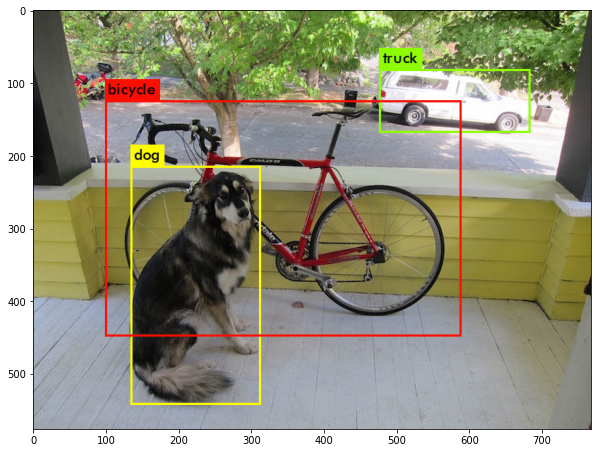

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg

plt.figure(figsize=(10, 20))
img = mimg.imread('predictions.jpg')
plt.imshow(img)

Check console output and paper's table 1 (Darknet).

- Console output:
```
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs

    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64

    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs

    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 152 x 128   ->   152 x 152 x 128

   12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256  3.407 BFLOPs

   13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   14 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   15 res   12                  76 x  76 x 256   ->    76 x  76 x 256
   16 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   17 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   18 res   15                  76 x  76 x 256   ->    76 x  76 x 256
   19 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   20 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   21 res   18                  76 x  76 x 256   ->    76 x  76 x 256
   22 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   23 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   24 res   21                  76 x  76 x 256   ->    76 x  76 x 256
   25 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   26 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   27 res   24                  76 x  76 x 256   ->    76 x  76 x 256
   28 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   29 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   30 res   27                  76 x  76 x 256   ->    76 x  76 x 256
   31 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   32 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   33 res   30                  76 x  76 x 256   ->    76 x  76 x 256
   34 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   35 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   36 res   33                  76 x  76 x 256   ->    76 x  76 x 256

   37 conv    512  3 x 3 / 2    76 x  76 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   
   38 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   39 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   40 res   37                  38 x  38 x 512   ->    38 x  38 x 512
   41 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   42 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   43 res   40                  38 x  38 x 512   ->    38 x  38 x 512
   44 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   45 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   46 res   43                  38 x  38 x 512   ->    38 x  38 x 512
   47 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   48 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   49 res   46                  38 x  38 x 512   ->    38 x  38 x 512
   50 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   51 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   52 res   49                  38 x  38 x 512   ->    38 x  38 x 512
   53 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   54 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   55 res   52                  38 x  38 x 512   ->    38 x  38 x 512
   56 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   57 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   58 res   55                  38 x  38 x 512   ->    38 x  38 x 512
   59 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   60 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   61 res   58                  38 x  38 x 512   ->    38 x  38 x 512
   62 conv   1024  3 x 3 / 2    38 x  38 x 512   ->    19 x  19 x1024  3.407 BFLOPs

   63 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   64 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   65 res   62                  19 x  19 x1024   ->    19 x  19 x1024
   66 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   67 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   68 res   65                  19 x  19 x1024   ->    19 x  19 x1024
   69 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   70 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   71 res   68                  19 x  19 x1024   ->    19 x  19 x1024
   72 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   73 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   74 res   71                  19 x  19 x1024   ->    19 x  19 x1024
   75 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   76 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   77 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   78 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   79 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   80 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   81 conv    255  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 255  0.189 BFLOPs
   82 yolo

   83 route  79
   84 conv    256  1 x 1 / 1    19 x  19 x 512   ->    19 x  19 x 256  0.095 BFLOPs
   85 upsample            2x    19 x  19 x 256   ->    38 x  38 x 256
   86 route  85 61
   87 conv    256  1 x 1 / 1    38 x  38 x 768   ->    38 x  38 x 256  0.568 BFLOPs
   88 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   89 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   90 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   91 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   92 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   93 conv    255  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 255  0.377 BFLOPs
   94 yolo

   95 route  91
   96 conv    128  1 x 1 / 1    38 x  38 x 256   ->    38 x  38 x 128  0.095 BFLOPs
   97 upsample            2x    38 x  38 x 128   ->    76 x  76 x 128
   98 route  97 36
   99 conv    128  1 x 1 / 1    76 x  76 x 384   ->    76 x  76 x 128  0.568 BFLOPs
  100 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
  101 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
  102 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
  103 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
  104 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
  105 conv    255  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 255  0.754 BFLOPs
  106 yolo
```
- Paper: [YOLOv3: An Incremental Improvement (Joseph Redmon, Ali Farhadi)](https://pjreddie.com/media/files/papers/YOLOv3.pdf)

This [link](https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b) could be helpful on understanding YOLO v3 architecture, intuitively.

In the next notebook, we will...
- try to use YOLO in tensorflow (or Keras).
- check inner implementations lightly.